# Sopio Bregadze 616049
# Benutzte Formeln:
# $\vec v_{Sonne}=-\frac{\vec v_{Erde}\cdot m_{Erde} + \vec v_{Mars}\cdot m_{Mars}}{m_{Sonne}}$
# $Y = (\vec r_{Sonne}, \vec v_{Sonne} ,\vec r_{Erde}, \vec v_{Erde} ,\vec r_{Mars}, \vec v_{Mars})$
# $\vec a_{Sonne} = \frac{G m_{Erde}(\vec r_{Erde}-\vec r_{Sonne})}{\mid \vec r_{Sonne}-\vec r_{Erde}\mid ^3} + \frac{G m_{Mars}(\vec r_{Mars}-\vec r_{Sonne})}{\mid \vec r_{Sonne}-\vec r_{Mars}\mid^3}$

# $\vec a_{Erde} = \frac{G m_{Sonne}(\vec r_{Sonne}-\vec r_{Erde})}{\mid \vec r_{Sonne}-\vec r_{Erde}\mid ^3} + \frac{G m_{Mars}(\vec r_{Mars}-\vec r_{Erde})}{\mid \vec r_{Erde}-\vec r_{Mars}\mid^3}$

# $\vec a_{Mars} = \frac{G m_{Sonne}(\vec r_{Sonne}-\vec r_{Mars})}{\mid \vec r_{Sonne}-\vec r_{Mars}\mid ^3} + \frac{G m_{Erde}(\vec r_{Erde}-\vec r_{Mars})}{\mid \vec r_{Erde}-\vec r_{Mars}\mid^3}$
# $F = (\vec v_{Sonne} ,\vec a_{Sonne},\vec v_{Erde} ,\vec a_{Erde},\vec v_{Mars} ,\vec a_{Mars})$
# $\frac{d}{dt}  Y(t) =  F(t, Y(t))$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate as sci

In [2]:
G=4*np.pi**2
m_Sonne = 1.989 * (10**30)
m_Erde = 5.972 * (10**24)
m_Mars = 6.417 * (10**23)
m_Erde/=m_Sonne
m_Mars/=m_Sonne
m_Sonne=1
r_Sonne = [0, 0, 0]
r_Erde = [0.84, 0.50, -0.06]
r_Mars = [1.51, -0.18, 0.04]
v_Erde = [-3.650, 5.214, 0.608]
v_Mars = [0.521, 5.214, -0.456]
v_Sonne=-( np.multiply(v_Erde,m_Erde) + np.multiply(v_Mars,m_Mars) )/m_Sonne
Y_0=np.zeros((18))
#Y_0: 0 r_Sonne[i]_x, 1 r_Sonne[i]_y, 2 r_Sonne[i]_z, 3 v_Sonne_x, 4 v_Sonne_y, 5 v_Sonne_z
# 6 r_Erde[i]_x, 7 r_Erde[i]_y, 8 r_Erde[i]_z, 9 v_Erde[i]_x, 10 v_Erde[i]_y, 11 v_Erde[i]_z
# 12 r_Mars[i]_x, 13 r_Mars[i]_y, 14 r_Mars[i]_z, 15 v_Mars[i]_x, 16 v_Mars[i]_y 17 v_Mars[i]_z
for i in range(3):
    Y_0[i]=r_Sonne[i]
    Y_0[3+i]=v_Sonne[i]
    Y_0[6+i]=r_Erde[i]
    Y_0[9+i]=v_Erde[i]
    Y_0[12+i]=r_Mars[i]
    Y_0[15+i]=v_Mars[i]

In [3]:
def Function (Y, t):
    r_S=np.zeros((3))
    r_E=np.zeros((3))
    r_M=np.zeros((3))
    F=np.zeros((18))
    for i in range(3):
        r_S[i]=Y[i]
        r_E[i]=Y[6+i]
        r_M[i]=Y[12+i]
    r_se=np.linalg.norm(np.subtract(r_S,r_E))
    r_sm=np.linalg.norm(np.subtract(r_S,r_M))
    r_em=np.linalg.norm(np.subtract(r_E,r_M))
    
    a_Sonne= np.multiply(np.subtract(r_E,r_S), G*m_Erde/(r_se**3))
    a_Sonne+= np.multiply(np.subtract(r_M,r_S), G*m_Mars/(r_sm**3))
    a_Erde= np.multiply(np.subtract(r_S,r_E), G/(r_se**3))
    a_Erde+= np.multiply(np.subtract(r_M,r_E), G*m_Mars/(r_em**3))
    a_Mars= np.multiply(np.subtract(r_S,r_M), G/(r_sm**3))
    a_Mars+= np.multiply(np.subtract(r_E,r_M), G*m_Erde/(r_em**3))
    
    for i in range(3):
        F[i]=Y[3+i]
        F[3+i]=a_Sonne[i]
        F[6+i]=Y[9+i]
        F[9+i]=a_Erde[i]
        F[12+i]=Y[15+i]
        F[15+i]=a_Mars[i]
    return F;

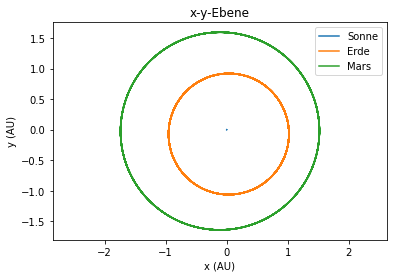

In [4]:
t = np.linspace(0,20,1000000)
Y=sci.odeint(Function, Y_0, t)

plt.plot(Y[:,0],Y[:,1], label="Sonne")
plt.plot(Y[:,6],Y[:,7], label="Erde")
plt.plot(Y[:,12],Y[:,13], label="Mars")
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.axis("equal")
plt.title('x-y-Ebene')
plt.legend(bbox_to_anchor = [1, 1])

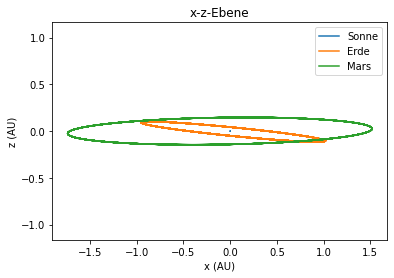

In [5]:
plt.plot(Y[:,0],Y[:,2], label="Sonne")
plt.plot(Y[:,6],Y[:,8], label="Erde")
plt.plot(Y[:,12],Y[:,14], label="Mars")
plt.xlabel('x (AU)')
plt.ylabel('z (AU)')
plt.axis("equal")
plt.title('x-z-Ebene')
plt.legend(bbox_to_anchor = [1, 1])

Text(0.5, 1.0, 'Distanz Erde-Mars')

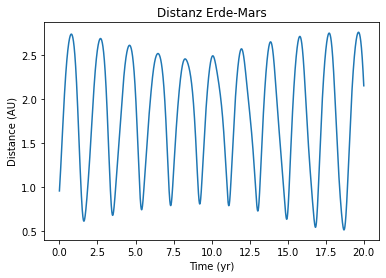

In [6]:
D=np.subtract(Y[:,6],Y[:,12])**2+np.subtract(Y[:,7],Y[:,13])**2+np.subtract(Y[:,8],Y[:,14])**2
plt.plot(t, np.sqrt(D))
plt.xlabel('Time (yr)')
plt.ylabel('Distance (AU)')
plt.title('Distanz Erde-Mars')